In [1]:
import os
import sys
import re
import matplotlib.pyplot as plt

In [6]:
# 绘制损失曲线

# 加载数据
root = '../mtl/logs/'
dataset = 'wild'
name1 = 'mmoe_reranked_seed24_epoch100_lr0.0001'
name2 = 'mmoe_reranked_seed24_epoch100_lr0.001'
name3= 'mmoe_reranked_seed24_epoch100_lr0.0005'
path1 = os.path.join(root,dataset,name1,'train.log')
path2 = os.path.join(root,dataset,name2,'train.log')
path3 = os.path.join(root,dataset,name3,'train.log')
with open(path1, 'r') as f:
    datas1 = f.readlines()
with open(path2, 'r') as f:
    datas2 = f.readlines()
with open(path3, 'r') as f:
    datas3 = f.readlines()
pattern = re.compile(r'total loss: (.*)')
values1 = []
for s in datas1:
    match = pattern.search(s)
    if match:
        values1.append(float(match.group(1))/17332)
values2 = []
for s in datas2:
    match = pattern.search(s)
    if match:
        values2.append(float(match.group(1))/17332)
values3 = []
for s in datas3:
    match = pattern.search(s)
    if match:
        values3.append(float(match.group(1))/17332)


In [3]:
values1[20:80]

[10.323732835218093,
 10.296911961977845,
 10.27623579217632,
 10.260591860431571,
 10.245507767424417,
 10.219419823159473,
 10.209893549503809,
 10.204336631663974,
 10.199734414666512,
 10.178171157396722,
 10.16976906877452,
 10.154412719247635,
 10.13817469132241,
 10.134785007500577,
 10.119830732171705,
 10.109955573505655,
 10.108338261597046,
 10.09185682552504,
 10.099854135414263,
 10.080490566582045,
 10.079288851546274,
 10.071936122490191,
 10.063709828640665,
 10.050759613720286,
 10.048104661897069,
 10.044968302850219,
 10.03111297022848,
 10.032154216189706,
 10.030471995441957,
 10.024639215035773,
 10.029308143895685,
 10.00716611614355,
 10.009368509116086,
 10.011200380798522,
 10.003830523021001,
 9.997535267135934,
 9.992896088160627,
 9.995110200784676,
 9.986729748442189,
 9.990190651684745,
 9.980823044080314,
 9.973503670955457,
 9.982245629471498,
 9.963972889741518,
 9.970282569813062,
 9.967783579506117,
 9.946543063408724,
 9.95977995903531,
 9.950878432

Text(0, 0.5, 'Average Loss')

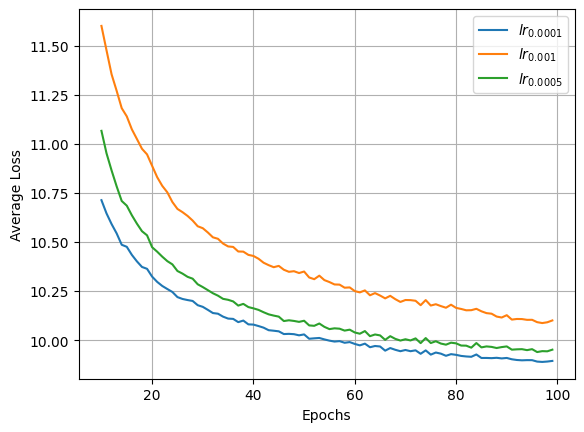

In [60]:
fig, ax = plt.subplots()
ax.plot(range(10, 100), values1[10:100], label='$lr_{0.0001}$')
ax.plot(range(10, 100), values2[10:100], label='$lr_{0.001}$')
ax.plot(range(10, 100), values3[10:100], label='$lr_{0.0005}$')
ax.legend()
ax.grid(1)
# ax.set_title('Float List Plot')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Loss')

In [61]:
fig.savefig('loss.pdf')

In [33]:
dirname1 = os.path.dirname(path1)
dirname2 = os.path.dirname(path2)
dirname3 = os.path.dirname(path3)

# print(dirs1)

In [2]:
def process_eval_group(dirname, start=20, end=80):
    assert start <= end, 'start should be inferior'
    dirs = os.listdir(dirname)
    dirs = [dir for dir in dirs if dir.startswith('eval')]
    dirs.sort(key=lambda x : [len(x), x])
    dirs_copy = []
    for dir in dirs:
        numbers = int(re.findall(r'\d+', dir)[0])
        if start <= numbers <= end:
            dirs_copy.append(dir)
    dirs = dirs_copy
    res = []
    for dir in dirs:
        with open(os.path.join(dirname, dir), 'r') as file:
            data = file.read()
        # 提取 mAP 后的 float 值
        mAP_value = re.search(r'mAP: (\d+\.\d+)', data)
        if mAP_value:
            mAP_value = float(mAP_value.group(1))
        else:
            mAP_value = None
        # 提取 Rank-1 后的 float 值
        Rank_1_value = re.search(r'Rank-1\': (\d+\.\d+)', data)
        if Rank_1_value:
            Rank_1_value = float(Rank_1_value.group(1))
        else:
            Rank_1_value = None
        res.append([mAP_value, Rank_1_value])
    return res

In [50]:
res1 = process_eval_group(dirname1)
res2 = process_eval_group(dirname2)
res3 = process_eval_group(dirname3)

m1, r1 = zip(*res1)
m2, r2 = zip(*res2)
m3, r3 = zip(*res3)



Text(0, 0.5, 'mAP')

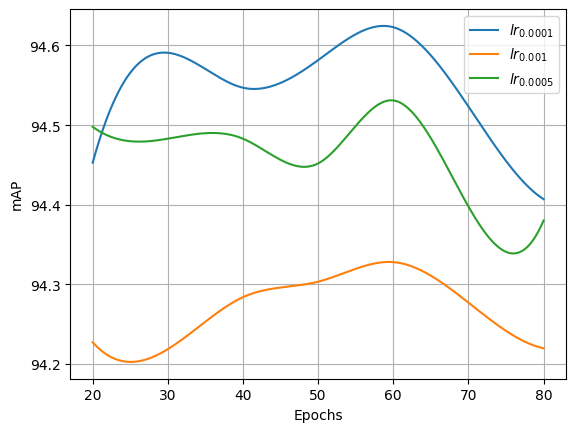

In [58]:
# 骚气曲线图
from scipy.interpolate import make_interp_spline
import numpy as np
fig1, ax1 = plt.subplots()
x_values = [10 * i for i in range(2, 9)]
c1 = make_interp_spline(x_values, m1)
c2 = make_interp_spline(x_values, m2)
c3 = make_interp_spline(x_values, m3)
xs = np.linspace(20, 80, 500)
y1 = c1(xs)
y2 = c2(xs)
y3 = c3(xs)
# ax1.set_xlim(16, 84)
ax1.plot(xs, y1, label='$lr_{0.0001}$')
ax1.plot(xs, y2, label='$lr_{0.001}$')
ax1.plot(xs, y3, label='$lr_{0.0005}$')
ax1.legend()
ax1.grid(1)
# ax.set_title('Float List Plot')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('mAP')

Text(0, 0.5, 'mAP')

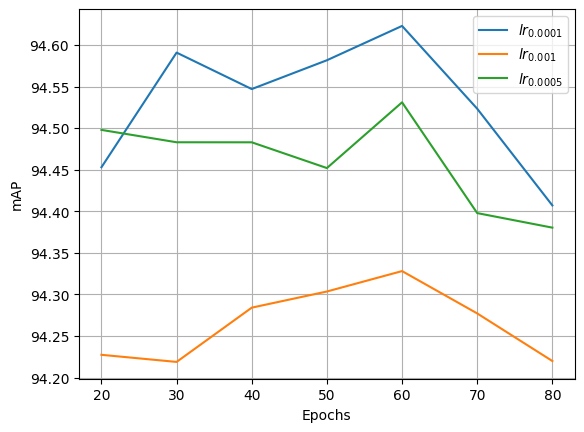

In [59]:
# 朴实折线图
fig1, ax1 = plt.subplots()
x_values = [10 * i for i in range(2, 9)]
# ax1.set_xlim(16, 84)
ax1.plot(x_values, m1, label='$lr_{0.0001}$')
ax1.plot(x_values, m2, label='$lr_{0.001}$')
ax1.plot(x_values, m3, label='$lr_{0.0005}$')
ax1.legend()
ax1.grid(1)
# ax.set_title('Float List Plot')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('mAP')

In [62]:
fig1.savefig('map.pdf')

Text(0, 0.5, 'mAP')

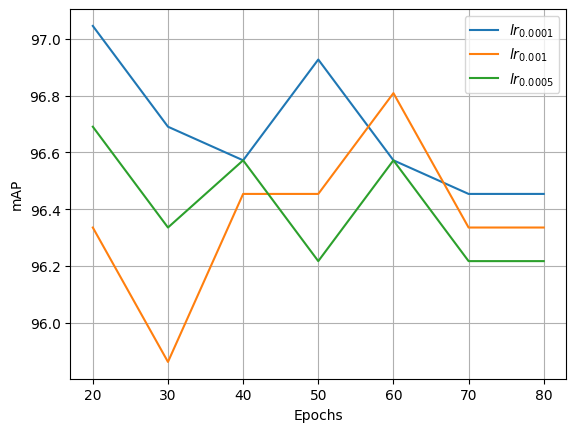

In [63]:
# 朴实折线图
fig2, ax2 = plt.subplots()
x_values = [10 * i for i in range(2, 9)]
# ax1.set_xlim(16, 84)
ax2.plot(x_values, r1, label='$lr_{0.0001}$')
ax2.plot(x_values, r2, label='$lr_{0.001}$')
ax2.plot(x_values, r3, label='$lr_{0.0005}$')
ax2.legend()
ax2.grid(1)
# ax.set_title('Float List Plot')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('mAP')

In [47]:
wild_root = '../mtl/logs/wild/mmoe_reranked_seed24_epoch100_lr0.0001/'
wild_dirs = ['fdn2_e80_lr0.0001_alpha0_seed1121_optim1','fdn2_e15_lr0.0001_alpha1000000_seed1121_optim1',
             'fdn2_e80_lr0.0001_alpha4000000_seed1121_optim1','fdn2_e15_lr0.0001_alpha16000000_seed1121_optim1']
multi_root = '../mtl/logs/multi/mmoe_reranked_seed24_epoch100_lr0.0001/'
multi_dirs = ['fdn2_e80_lr0.0001_alpha0_seed1121_optim1','fdn2_e15_lr0.0001_alpha1000000_seed1121_optim1',
             'fdn2_e15_lr0.0001_alpha4000000_seed1121_optim1','fdn2_e15_lr0.0001_alpha16000000_seed1121_optim1']

In [12]:
def process_eval_group2(dirname, start=1, end=3):
    assert start <= end, 'start should be inferior'
    dirs = os.listdir(dirname)
    dirs = [dir for dir in dirs if dir.startswith('eval')]
    dirs.sort(key=lambda x : [len(x), x])
    dirs_copy = []
    for dir in dirs:
        numbers = int(re.findall(r'\d+', dir)[0])
        if start <= numbers <= end:
            dirs_copy.append(dir)
    dirs = dirs_copy
    res = []
    for dir in dirs:
        with open(os.path.join(dirname, dir), 'r') as file:
            data = file.read()
        # 提取 mAP 后的 float 值
        mAP_value = re.search(r'mAP: (\d+\.\d+)', data)
        if mAP_value:
            mAP_value = float(mAP_value.group(1))
        else:
            mAP_value = None
        # 提取 Rank-1 后的 float 值
        Rank_1_value = re.search(r'Rank-1\': (\d+\.\d+)', data)
        if Rank_1_value:
            Rank_1_value = float(Rank_1_value.group(1))
        else:
            Rank_1_value = None
        mINP_value = re.search(r'mINP: (\d+\.\d+)', data)
        if mINP_value:
            mINP_value = float(mINP_value.group(1))
        else:
            mINP_value = None
        res.append([Rank_1_value, mAP_value, mINP_value])
    return res

In [48]:
wild_res = []
for wd in wild_dirs:
    wild_res.append(process_eval_group2(os.path.join(wild_root, wd)))

In [49]:
wild_res

[[[96.80851101875305, 94.58657411706734, 86.52516569473427],
  [96.57210111618042, 94.58328469872795, 86.63473682010024],
  [96.45389914512634, 94.42869037199112, 86.52097408170543]],
 [[96.57210111618042, 94.50997544374316, 86.31492974318857],
  [96.69030904769897, 94.50062242597113, 86.72129347905464],
  [96.33569717407227, 94.47298041882162, 86.70615261650467]],
 [[96.57210111618042, 94.56123147876723, 86.42717163499873],
  [96.69030904769897, 94.56555399411508, 86.79035376302328],
  [96.45389914512634, 94.53596321576919, 86.57579181494998]],
 [[96.57210111618042, 94.53226285677619, 86.38761492347622],
  [96.69030904769897, 94.57551249759943, 86.7801847703239],
  [96.45389914512634, 94.5443604074131, 86.52476420799172]]]

In [50]:
wild_res_ave = [[sum(s) for s in r] for r in wild_res]

In [51]:
wild_res_ave
    

[[277.92025083055466, 277.79012263500863, 277.4035635988229],
 [277.3970063031121, 277.9122249527247, 277.51483020939855],
 [277.5605042299464, 278.04621680483734, 277.5656541758455],
 [277.49197889643284, 278.0460063156223, 277.52302376053115]]

Text(0, 0.5, 'Average Metrics')

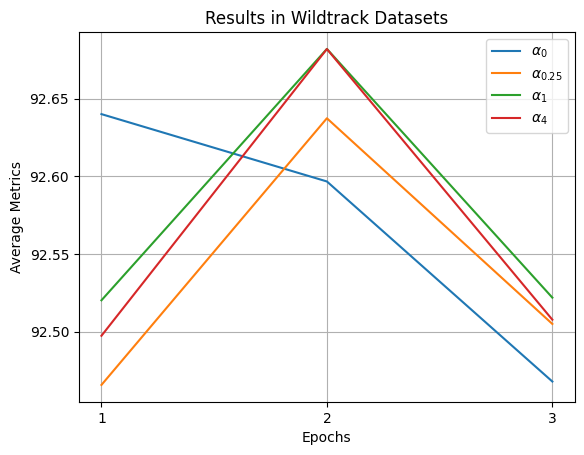

In [62]:
figw, axw = plt.subplots()
plt.xticks([1,2,3])
x_values = [i+1 for i in range(3)]
values = [0, 0.25, 1, 4]
# ax1.set_xlim(16, 84)
for i in range(len(wild_res_ave)):
    axw.plot(x_values, [s/3 for s in wild_res_ave[i]], label=r'$\alpha_{'+str(values[i])+'}$')
# axw.plot(x_values, r2, label='$lr_{0.001}$')
# axw.plot(x_values, r3, label='$lr_{0.0005}$')
axw.legend()
axw.grid(1)
axw.set_title('Results in Wildtrack Datasets')

axw.set_xlabel('Epochs')
axw.set_ylabel('Average Metrics')

In [63]:
figw.savefig('rw.pdf')

In [44]:
multi_res = []
for md in multi_dirs:
    multi_res.append(process_eval_group2(os.path.join(multi_root, md)))

In [45]:
multi_res_ave = [[sum(s) for s in r] for r in multi_res]
multi_res_ave

[[278.11915669586625, 278.288250838763, 277.2929309582962],
 [278.8560241220848, 279.1375225648972, 278.79211181686236],
 [278.9362887562037, 279.3450979484278, 278.8465358894426],
 [278.8835136891546, 279.1967798720793, 278.82505751439976]]

Text(0, 0.5, 'Average Metrics')

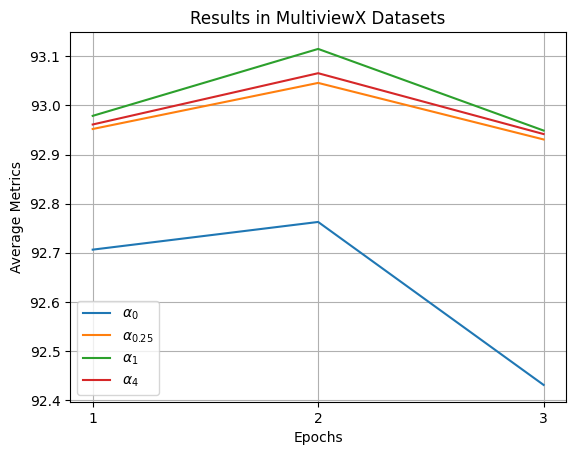

In [60]:
figm, axm = plt.subplots()
plt.xticks([1,2,3])
x_values = [i+1 for i in range(3)]
values = [0, 0.25, 1, 4]
# ax1.set_xlim(16, 84)
for i in range(len(multi_res_ave)):
    axm.plot(x_values, [s/3 for s in multi_res_ave[i]], label=r'$\alpha_{'+str(values[i])+'}$')
# axw.plot(x_values, r2, label='$lr_{0.001}$')
# axw.plot(x_values, r3, label='$lr_{0.0005}$')
axm.legend()
axm.grid(1)
axm.set_title('Results in MultiviewX Datasets')
axm.set_xlabel('Epochs')
axm.set_ylabel('Average Metrics')

In [61]:
figm.savefig('rm.pdf')